# Simulation-Based/Likelihood-Free Inference Quick Start
We would like to perform inference on a model's parameters $\theta$ given observations $\{x\}_i$ :
$$
P\left(\theta \mid\{x\}_i\right)
$$
which relies on the likelihood function $
P\left(\{x\}_i \mid \theta\right)
$, However, what if we don't know the likelihood? What if all we can do is simulate outputs $x$ given $\theta$ ?
$$
x \sim \operatorname{Simulator}(\theta)
$$
Well, say we take this simulator, and can simulate enough examples such that we can measure the frequency of examples reproducing the data (or getting close to it). This is called Approximate Bayesian Computation, or ABC:
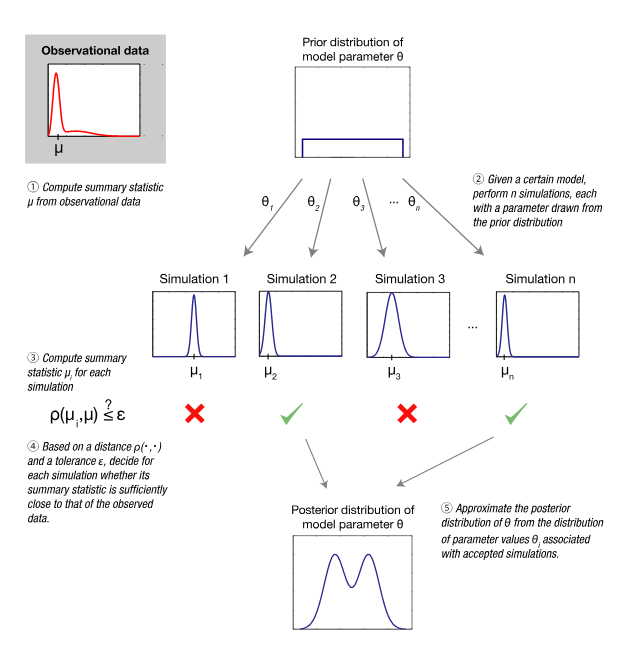

But, what if the simulation is very expensive, and the data is high dimensional? Then we would need to run far too many simulations. E.g., images of a galaxy - we can't simply simulate enough galaxies until the pixels match up!

So we turn to Likelihood-Free Inference. Instead of needing to call the simulation over and over, we instead run it only a few times, and fit a function:
$$
P(\theta \mid x)
$$
for several examples of $\{\theta, x\}_i$, such that $\sum_i \log P(\theta \mid x)$ is maximized over the data.

# Density estimation

But what is $P(\theta \mid x)$ and how can we ensure it's normalized?

This is where density estimation-based LFI (DELFI) comes into play. We would like to fit a distribution over $\theta$, rather than a point-to-point function. One example is we would like to fit a function that predicts $(\mu, \sigma)$ for a 1D Gaussian to model $\theta$, given a datapoint $x$. I.e.,
$$
P(\theta \mid x)=\mathcal{N}\left(\mu=f_1(x), \sigma=f_2(x)\right)
$$

This gives us log-probabilities of $\theta$, and we know that this function is normalized. And we maximize the likelihood of that Gaussian over the dataset by tweaking the parameters of $f_1$ and $f_2$. This can be done with Neural Networks with some imposed smoothness regularization on $f_i$ so they don't overfit.

Furthermore, if one does not expect the posterior to look Gaussian (or a Gaussian mixture model), one can turn to "Normalizing Flows".

A normalizing flow is a flexible transformation between probability distributions:
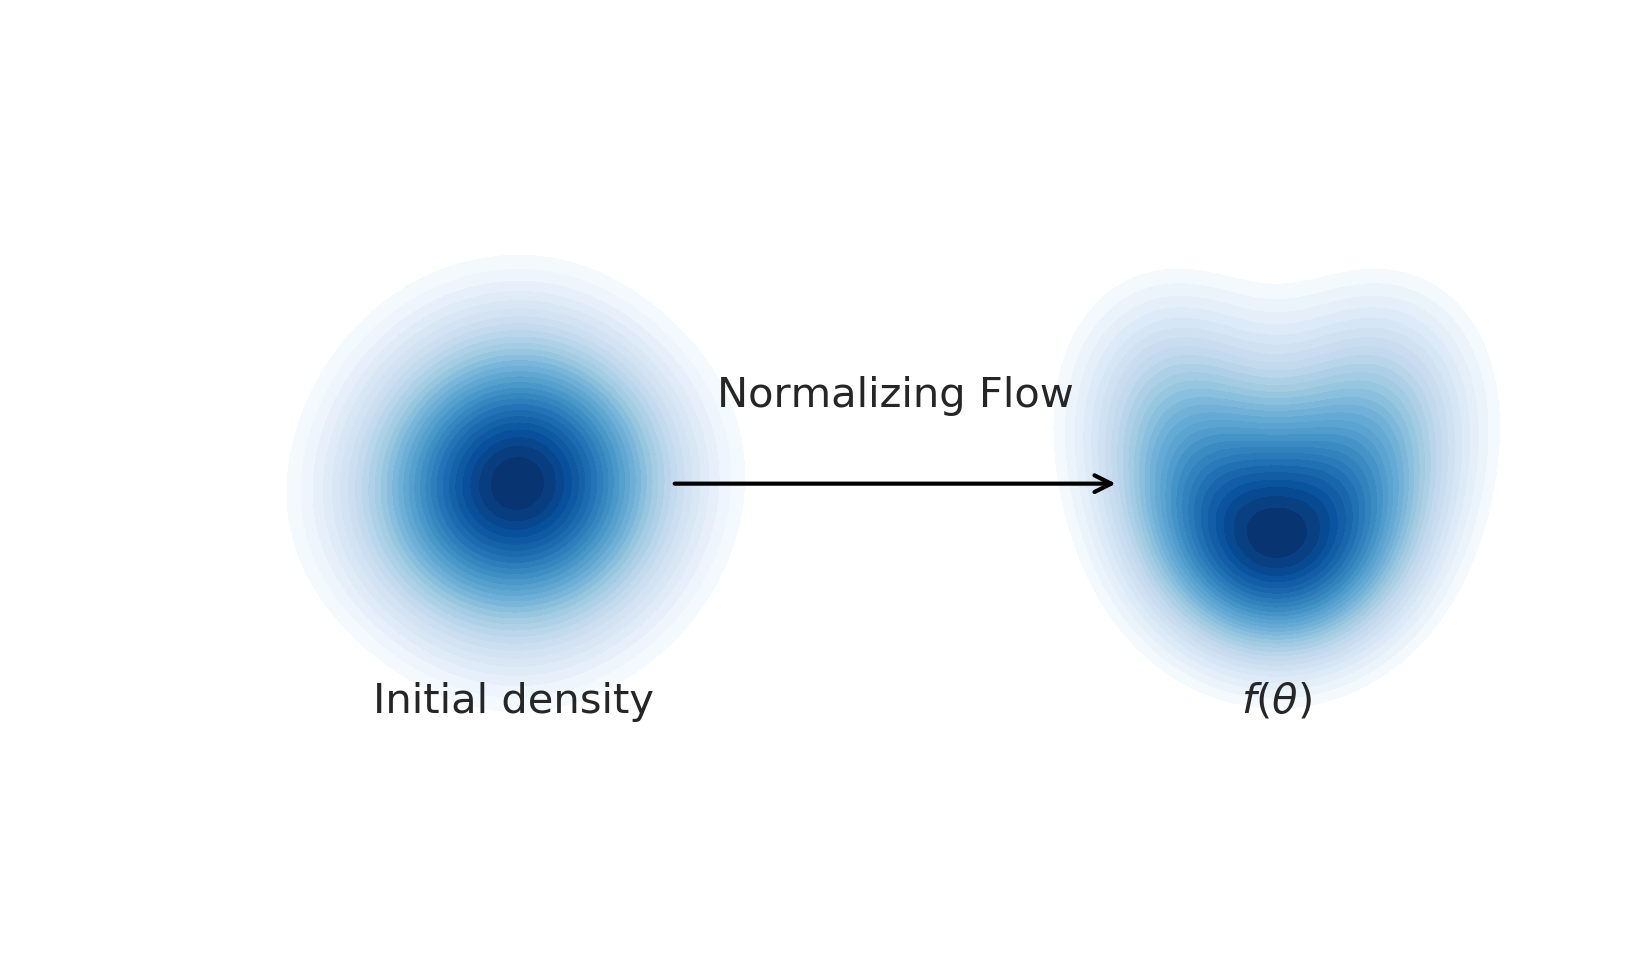

A normalizing flow learns an invertible dynamical model for samples of the distribution. Sample a Gaussian, and go forward through the dynamical model to sample the learned distribution. Invert the model and go backward from a sample to the compute the likelihood.
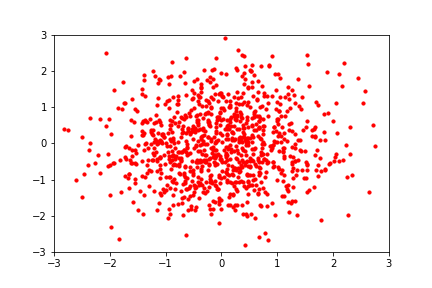

Each step is autoregressive ${ }^{\wedge}$ (=change in $y$ depends on $x$, followed by change in $x$ depends on $y)$, allowing it to be invertible. The invertibility implies normalization, since we aren't creating additional Monte Carlo samples.

If you learn the dynamics with a flexible model, like a neural network, you can actually model an arbitrary distribution. This is great for non-Gaussian distributions.

For an astronomy example, check out this paper where we learn an accurate data-driven HR diagram directly from Gaia data with a normalizing flow. No theory and no assumption of Gaussianity.